in this notebook we will try to answer the following questions:
What is Host's profile?

What are the key drivers that categorize hosts and how that is revealed through the differences of services they offer?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


df_list = pd.read_csv(r'C:\Users\5570 i5\Desktop\Udacity\Project 1\df_list.csv')
df_list.head()

,id,host_response_time,reviews_per_month,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,has_availability_bool,requires_license_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,price_dollar,weekly_price_dollar,monthly_price_dollar,security_deposit_dollar,cleaning_fee_dollar,extra_people_dollar,host_response_rate_perc
0,241032,within a few hours,4.07,Queen Anne,3.0,3.0,Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,True,False,False,False,False,True,85.0,NaN,NaN,NaN,NaN,NaN,96.0
1,953595,within an hour,1.48,Queen Anne,6.0,6.0,Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,True,False,False,True,True,True,150.0,1000.0,3000.0,100.0,40.0,40.0,98.0
2,3308979,within a few hours,1.15,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,True,False,False,False,False,True,975.0,NaN,NaN,1000.0,300.0,300.0,67.0
3,7421966,NaN,NaN,Queen Anne,1.0,1.0,Queen Anne,"Seattle, WA",47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,1125,6 months ago,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,True,False,False,False,False,False,100.0,650.0,2300.0,NaN,NaN,NaN,NaN
4,278830,within an hour,0.89,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,6,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,True,False,False,False,False,False,450.0,NaN,NaN,700.0,125.0,125.0,100.0


Our first inquiry in the data is to explore cancelation policy and and try to find out:
1) what is the profile of hosts under the different policies
2) Customers' view on this and how and if cancelation policy impacts their view

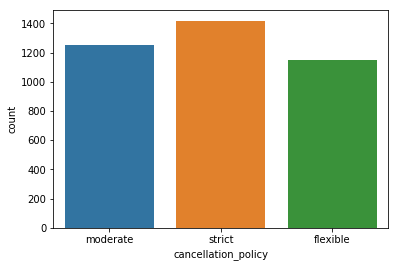

In [2]:
ax=sns.countplot(x=df_list.cancellation_policy)





From the above we can understand that most hosts follow a strict cancelation policy, but not a lot more than hosts who follow moderate or flexible policy.

This actually gets a very useful tool in order to create a good host profile. Any possible substantial difference in proportions between layers of cancelation policy for some other attributes signals for a specific property/behavior of the host






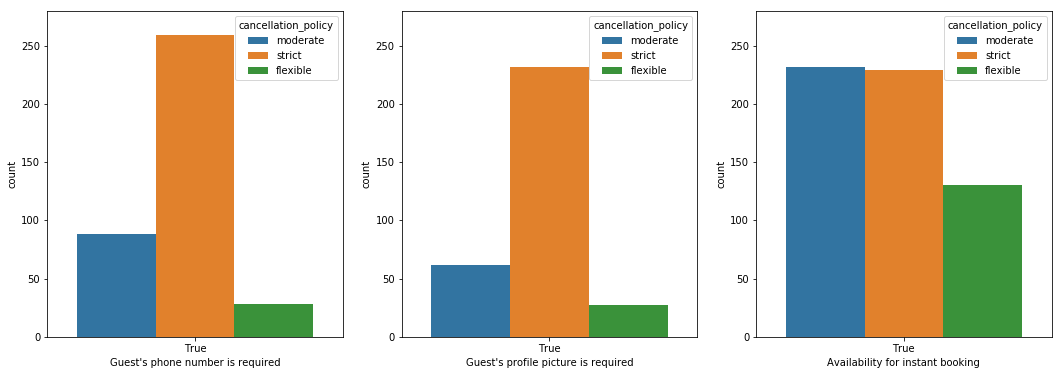

In [3]:
fig, axs = plt.subplots(ncols=3,figsize=(18,6))

sns.countplot(x=df_list.require_guest_phone_verification_bool[df_list.require_guest_phone_verification_bool==True] ,
                 hue=df_list.cancellation_policy,
                 ax=axs[0])
axs[0].set(xlabel="Guest's phone number is required")


sns.countplot(x=df_list.require_guest_profile_picture_bool[df_list.require_guest_profile_picture_bool==True] ,
                 hue=df_list.cancellation_policy,
                 ax=axs[1])
axs[1].set(xlabel="Guest's profile picture is required")


sns.countplot(x=df_list.instant_bookable_bool[df_list.instant_bookable_bool==True] ,
                 hue=df_list.cancellation_policy,
                 ax=axs[2])
axs[2].set(xlabel="Availability for instant booking")



axs[0].set(ylim=(0, 280))
axs[1].set(ylim=(0, 280))
axs[2].set(ylim=(0, 280))
plt.show()

Here we can see clearly that hosts who have strict cancellation police they generally follow a more conservative way of contacting business, requiring more confirmation from guests (guests' personal info like profile photo and telephone number) 
than hosts who have less strict cancellation policy.

Furthermore, hosts with strict cancellation policy seem to be more hesitant to provide instant booking choice than hosts in the other two less strict categories.

In the following analysis we will to derive a profile for hosts depending on the cancellation policy that they apply

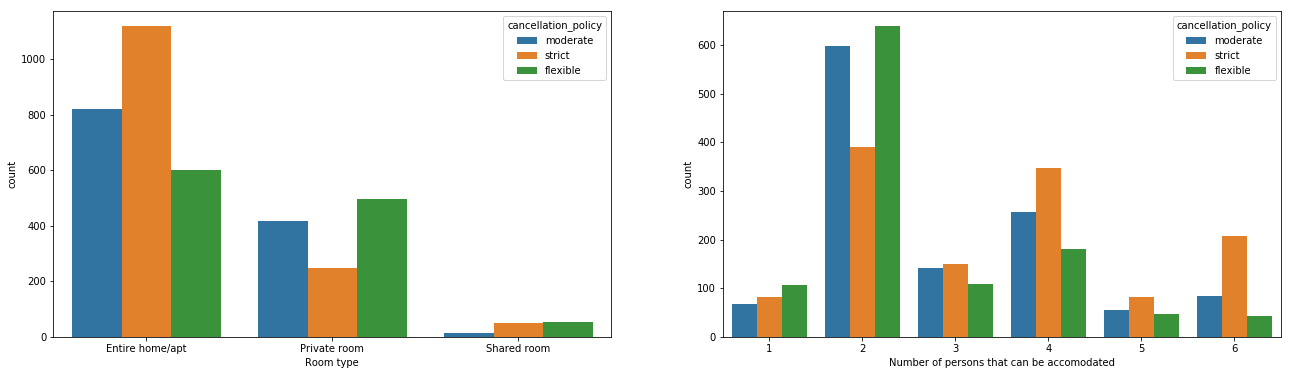

In [4]:
fig, axs = plt.subplots(ncols=2,figsize=(22,6))

sns.countplot(x=df_list.room_type ,
                 hue=df_list.cancellation_policy,
                 ax=axs[0])
axs[0].set(xlabel="Room type")



sns.countplot(x=df_list.accommodates[df_list.accommodates<7],
              hue=df_list.cancellation_policy,
              ax=axs[1]
             )
axs[1].set(xlabel="Number of persons that can be accomodated")

plt.show()

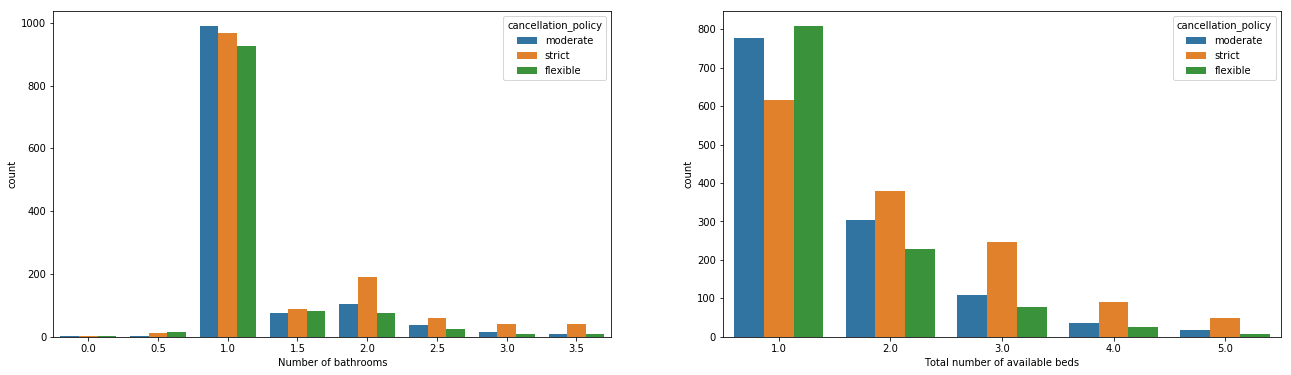

In [5]:
fig, axs = plt.subplots(ncols=2,figsize=(22,6))

sns.countplot(x=df_list.bathrooms[df_list.bathrooms<4],
              hue=df_list.cancellation_policy
             ,ax=axs[0])
axs[0].set(xlabel="Number of bathrooms")


sns.countplot(x=df_list.beds[df_list.beds<6],
              hue=df_list.cancellation_policy
             ,ax=axs[1])
axs[1].set(xlabel="Total number of available beds")


plt.show()

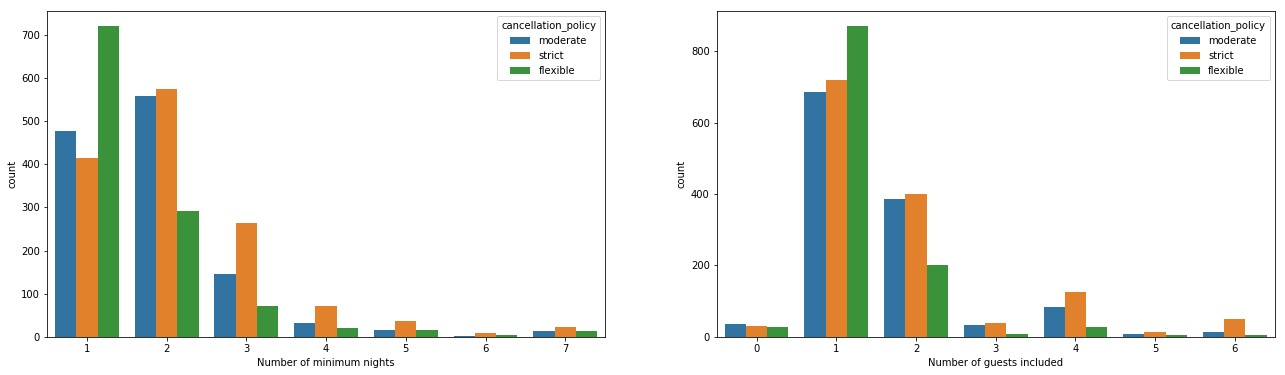

In [6]:
fig, axs = plt.subplots(ncols=2,figsize=(22,6))

sns.countplot(x=df_list.minimum_nights[df_list.minimum_nights<8],
              hue=df_list.cancellation_policy
             ,ax=axs[0])
axs[0].set(xlabel="Number of minimum nights")


sns.countplot(x=df_list.guests_included[df_list.guests_included<7],
              hue=df_list.cancellation_policy
             ,ax=axs[1])
axs[1].set(xlabel="Number of guests included")


plt.show()




The above graphs shows us that:

1) Hosts with strict cancelation policy seem to address more to guests with family profile providing more bigger spaces (homes or apartments with bigger number of bedrooms and bathrooms). They tend to host larger group of persons (2 or more) and offer their services for longer periods than overnights. 

2) On the contrary hosts with flexible cancellation policy tend to service more temporary situations (1 minimum night accomodation), addressing to individuals (1 guest is very frequent)  and offering smaller spaces (room type of accomodation)




